#### Part 25: Advanced Data Visualization in Pandas

In this notebook, we'll explore more advanced data visualization techniques in pandas, including:
- Stacked and horizontal bar plots
- Histograms with various options
- Advanced scatter plots
- Hexagonal bin plots

##### Setup
First, let's import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('ggplot')

# Make plots appear in the notebook
%matplotlib inline

##### 1. Bar Plots

### 1.1 Stacked Bar Plots

Stacked bar plots are useful for showing the composition of different categories:

<Axes: title={'center': 'Stacked Bar Plot'}>

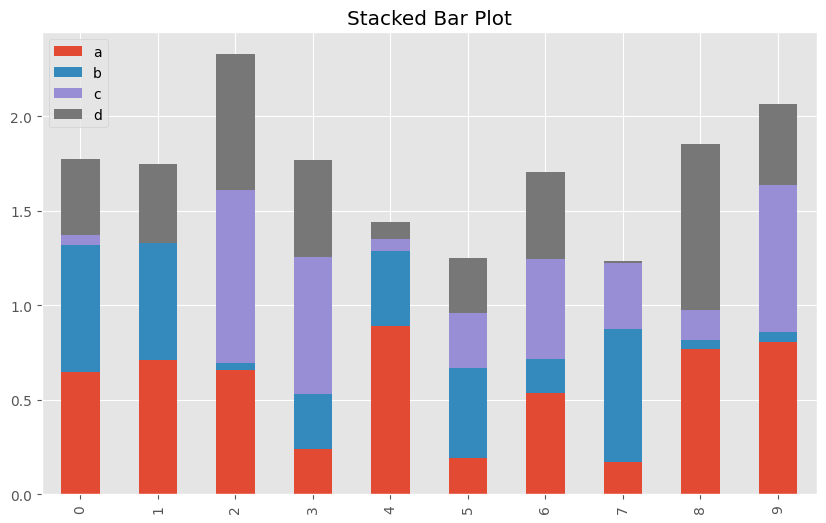

In [2]:
# Create a DataFrame for bar plots
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# Create a stacked bar plot
df2.plot.bar(stacked=True, figsize=(10, 6), title='Stacked Bar Plot')

### 1.2 Horizontal Bar Plots

Horizontal bar plots are particularly useful when you have long category names:

<Axes: title={'center': 'Horizontal Stacked Bar Plot'}>

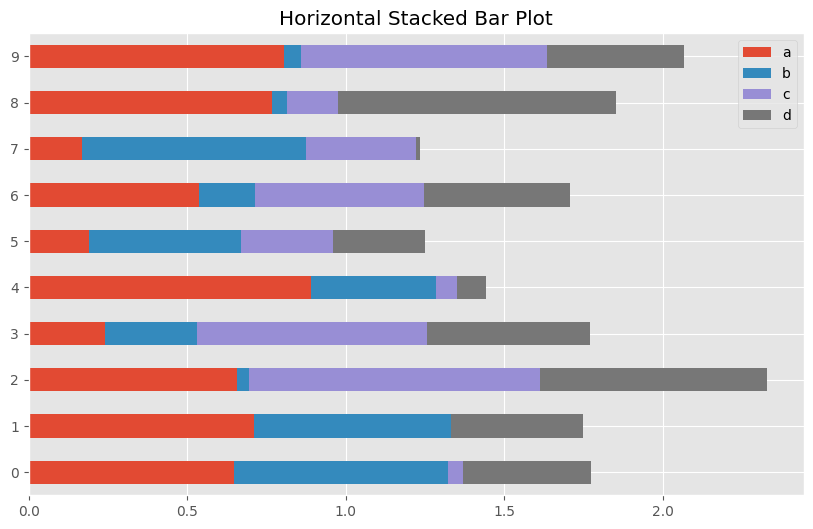

In [3]:
# Create a horizontal stacked bar plot
df2.plot.barh(stacked=True, figsize=(10, 6), title='Horizontal Stacked Bar Plot')

##### 2. Histograms

Histograms are useful for visualizing the distribution of data:

<Axes: title={'center': 'Histogram with Transparency'}, ylabel='Frequency'>

<Figure size 1000x600 with 0 Axes>

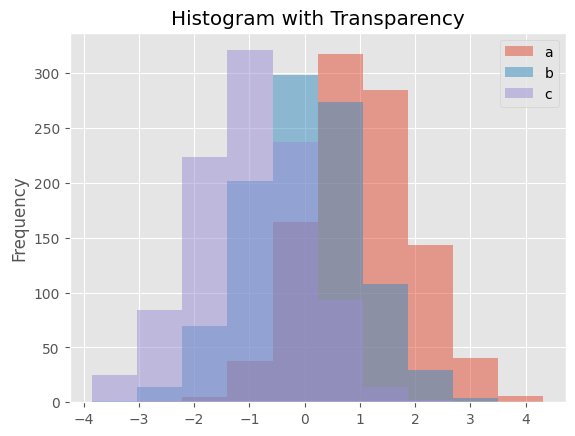

In [4]:
# Create a DataFrame with different distributions
df4 = pd.DataFrame({
    'a': np.random.randn(1000) + 1,  # Shifted to the right
    'b': np.random.randn(1000),      # Standard normal
    'c': np.random.randn(1000) - 1   # Shifted to the left
}, columns=['a', 'b', 'c'])

# Create a histogram with transparency
plt.figure(figsize=(10, 6))
df4.plot.hist(alpha=0.5, title='Histogram with Transparency')

### 2.1 Stacked Histograms

You can also create stacked histograms:

<Axes: title={'center': 'Stacked Histogram with Custom Bins'}, ylabel='Frequency'>

<Figure size 1000x600 with 0 Axes>

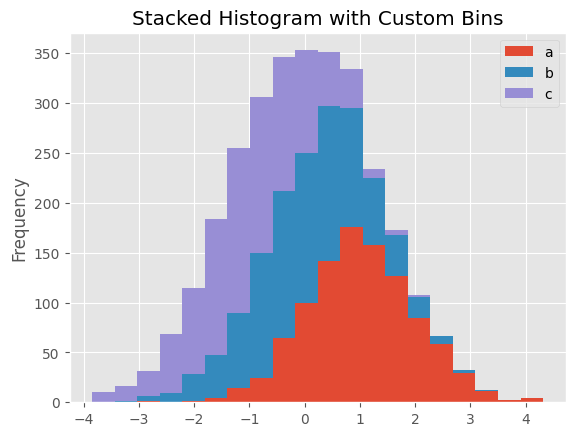

In [5]:
# Create a stacked histogram with custom bins
plt.figure(figsize=(10, 6))
df4.plot.hist(stacked=True, bins=20, title='Stacked Histogram with Custom Bins')

### 2.2 Horizontal and Cumulative Histograms

You can create horizontal and cumulative histograms:

<Axes: title={'center': 'Horizontal Cumulative Histogram'}, xlabel='Frequency'>

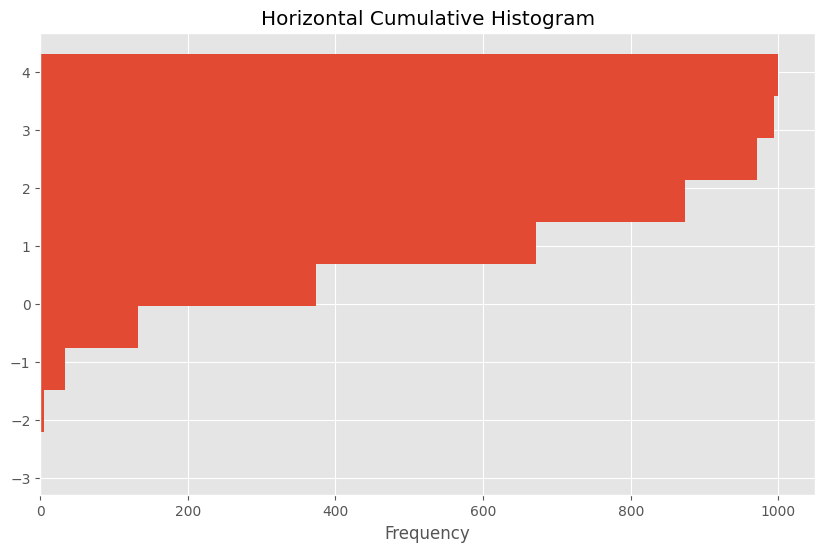

In [6]:
# Create a horizontal cumulative histogram
plt.figure(figsize=(10, 6))
df4['a'].plot.hist(orientation='horizontal', cumulative=True, 
                   title='Horizontal Cumulative Histogram')

### 2.3 Using the hist Method

You can also use the `hist` method directly:

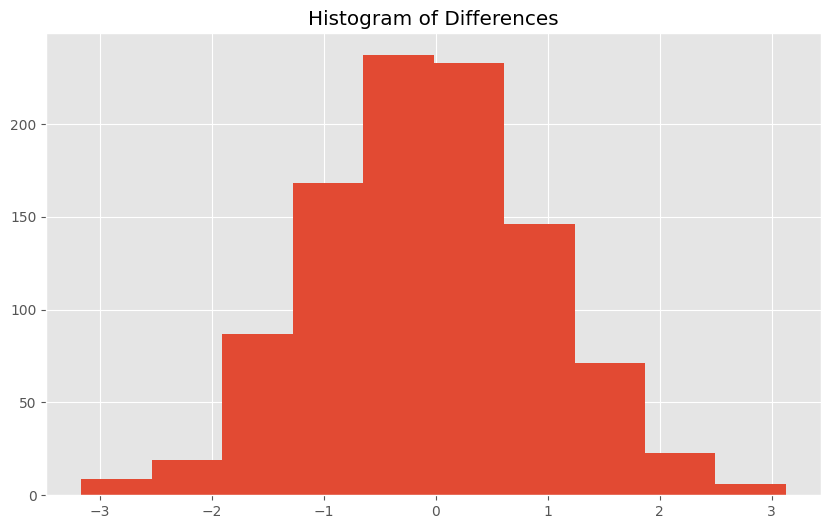

In [8]:
# Create a time series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

# Create a histogram of the differences
plt.figure(figsize=(10, 6))
df['A'].diff().hist()  # Remove the title parameter
plt.title('Histogram of Differences')  # Set title separately
plt.show()

##### 3. Advanced Scatter Plots

Scatter plots are useful for visualizing the relationship between two variables:

<Axes: title={'center': 'Basic Scatter Plot'}, xlabel='a', ylabel='b'>

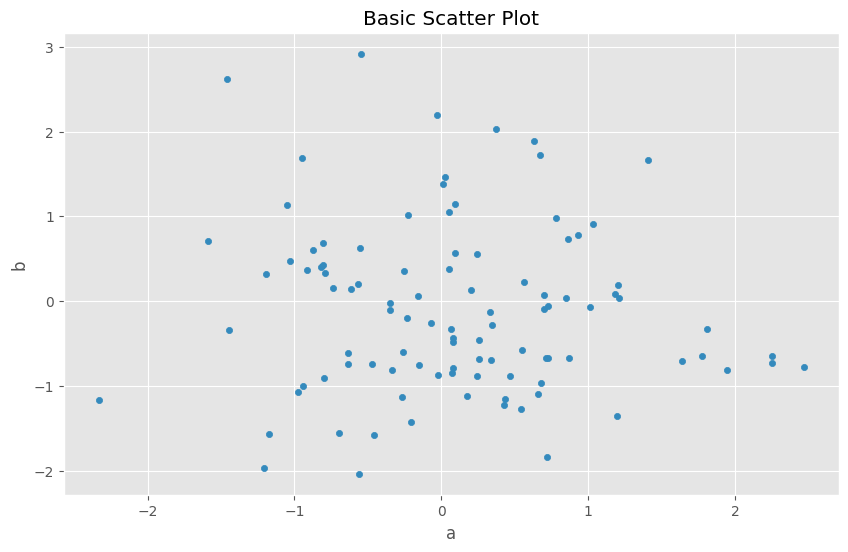

In [9]:
# Create a DataFrame for scatter plots
df = pd.DataFrame({
    'a': np.random.randn(100),
    'b': np.random.randn(100),
    'c': np.random.randn(100),
    'd': np.random.randn(100)
})

# Create a basic scatter plot
df.plot.scatter(x='a', y='b', figsize=(10, 6), title='Basic Scatter Plot')

### 3.1 Multiple Scatter Plots on the Same Axes

You can create multiple scatter plots on the same axes:

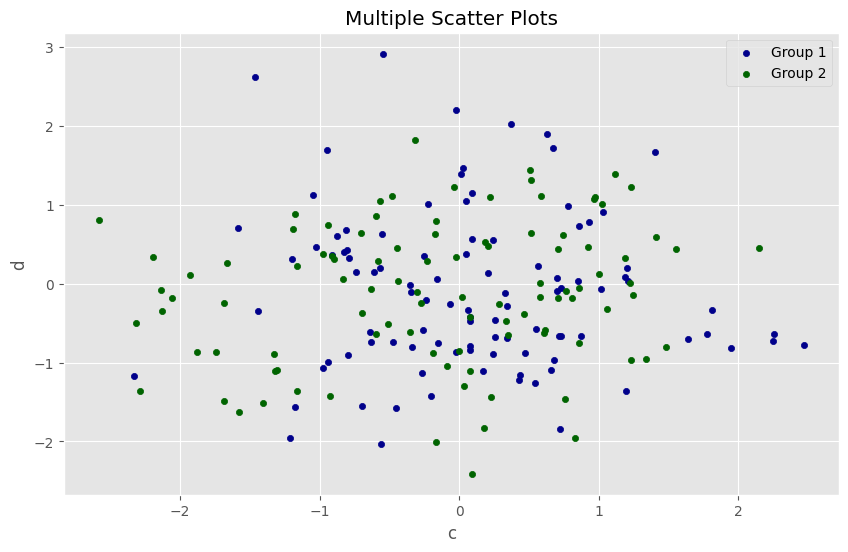

In [10]:
# Create multiple scatter plots on the same axes
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1', ax=ax)
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)
plt.title('Multiple Scatter Plots')
plt.legend()

### 3.2 Colored Scatter Plots

You can color the points in a scatter plot based on a column in your DataFrame:

<Axes: title={'center': 'Colored Scatter Plot'}, xlabel='a', ylabel='b'>

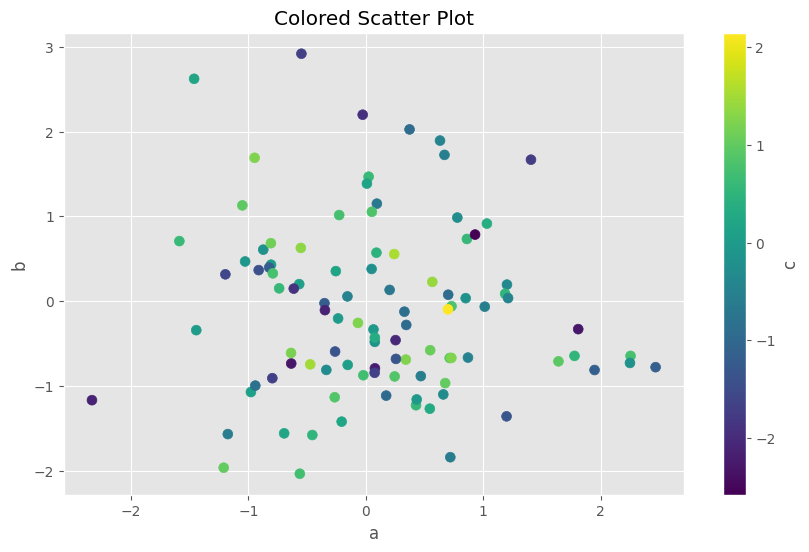

In [11]:
# Create a colored scatter plot
df.plot.scatter(x='a', y='b', c='c', s=50, figsize=(10, 6), 
                title='Colored Scatter Plot')

### 3.3 Bubble Charts

You can create a bubble chart by varying the size of the points:

/Users/neo/Downloads/Personal/Projects/pandas-tutorial/venv/lib/python3.13/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: title={'center': 'Bubble Chart'}, xlabel='a', ylabel='b'>

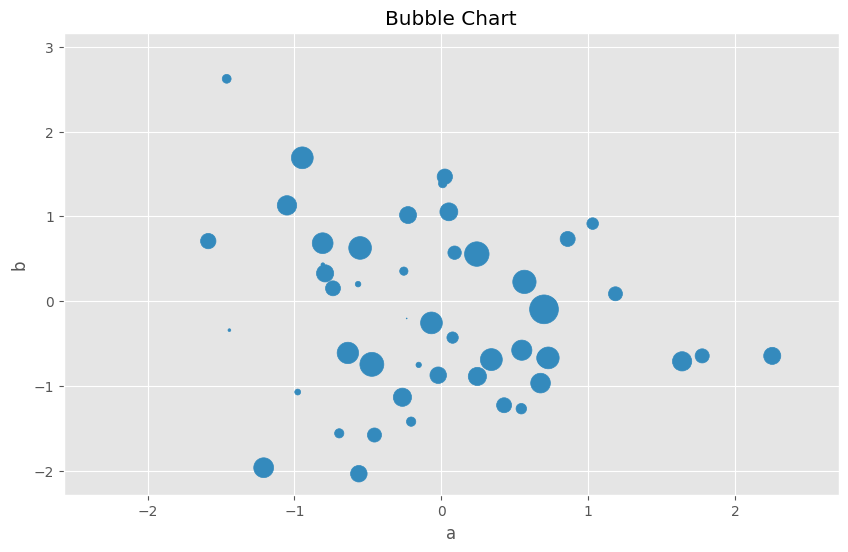

In [12]:
# Create a bubble chart
df.plot.scatter(x='a', y='b', s=df['c'] * 200, figsize=(10, 6), 
                title='Bubble Chart')

##### 4. Hexagonal Bin Plots

Hexagonal bin plots are useful for visualizing the density of points in a scatter plot, especially when there are many points:

<Axes: title={'center': 'Hexagonal Bin Plot'}, xlabel='a', ylabel='b'>

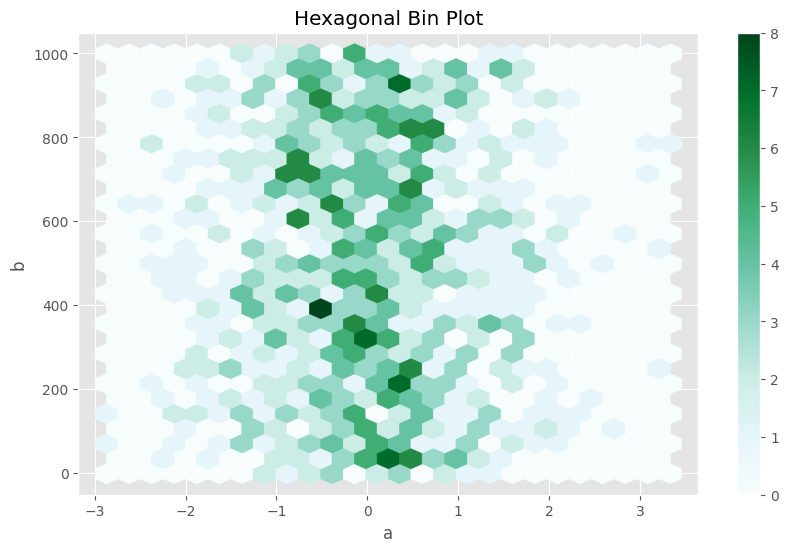

In [13]:
# Create a DataFrame for hexbin plot
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)  # Add a trend to 'b'

# Create a hexbin plot
df.plot.hexbin(x='a', y='b', gridsize=25, figsize=(10, 6), 
               title='Hexagonal Bin Plot')

### 4.1 Hexbin with Custom Aggregation

You can specify alternative aggregations for the bins:

<Axes: title={'center': 'Hexbin with Custom Aggregation'}, xlabel='a', ylabel='b'>

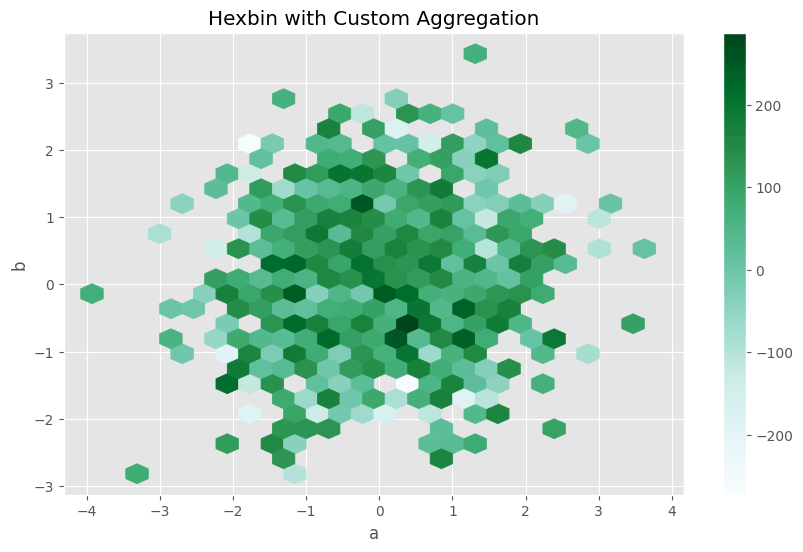

In [14]:
# Create a DataFrame with an additional column for aggregation
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['z'] = np.random.randn(1000) * 100

# Create a hexbin plot with custom aggregation
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25, 
               figsize=(10, 6), title='Hexbin with Custom Aggregation')

##### 5. Combining Different Plot Types

You can combine different plot types by using matplotlib's object-oriented interface:

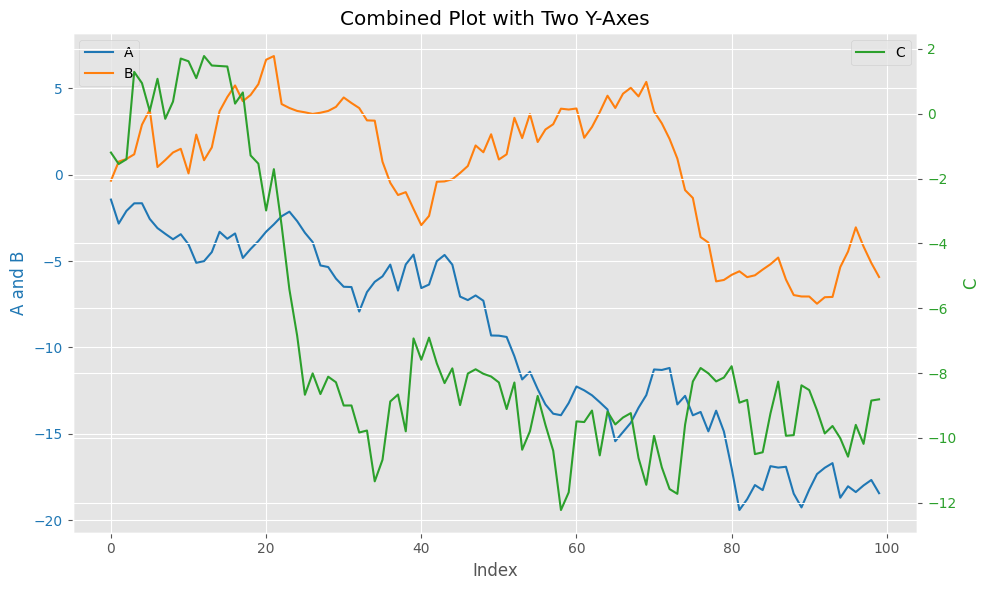

In [15]:
# Create a DataFrame for combined plot
df = pd.DataFrame({
    'A': np.random.randn(100).cumsum(),
    'B': np.random.randn(100).cumsum(),
    'C': np.random.randn(100).cumsum()
})

# Create a combined plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot line on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('A and B', color=color)
ax1.plot(df.index, df['A'], color=color, label='A')
ax1.plot(df.index, df['B'], color='tab:orange', label='B')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('C', color=color)
ax2.plot(df.index, df['C'], color=color, label='C')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Combined Plot with Two Y-Axes')
fig.tight_layout()

##### Summary

In this notebook, we've explored more advanced data visualization techniques in pandas, including:

1. Bar plots:
   - Stacked bar plots
   - Horizontal bar plots

2. Histograms:
   - Basic histograms with transparency
   - Stacked histograms with custom bins
   - Horizontal and cumulative histograms

3. Advanced scatter plots:
   - Multiple scatter plots on the same axes
   - Colored scatter plots
   - Bubble charts

4. Hexagonal bin plots:
   - Basic hexbin plots
   - Hexbin plots with custom aggregation

5. Combining different plot types

These visualization techniques are powerful tools for exploratory data analysis and presenting your findings effectively.